# Understanding Bootstrapping

---

The idea of bootstrapping is that we can do ramresampling the dataset we have,  and then treat these  "new" datasets, since datasets are valuable and usually difficult to gather.

>Source: [Waterloo Data Science meetup](https://www.youtube.com/watch?v=I4ra13rqrH4)  

A user log in your website and spend some time on it, and your server will record the time. From these data, we can calculate the mean of these data to know the average of time the user spend on your website. However, even you got the mean from these data, you still cannot saying that it presents the mean of the overall distribution of user spending time.
Let's first focus on 2 concerns:
1. How to estimate the mean of the overall of time that the user spend on your website?
2. If some changes was done on the website, how to find the change affect the user's behaviour in terms of time spending on your website.

Firstly, though sample mean can be regarded as the unbiased estimator of a distribution mean ($E[\bar {X}]=\mu$), it still have the variance ($Var[\bar {X}]=\frac{\sigma}{N}$). Secondly, when comparing the sample mean of two dataset by using t-test, the result is not accurate. Since the t-test assumes that the data distribution is normal where the mean value will be in the middle. Hence the t-test wouldnt work here.

### Bootstrap
Here we use bootstrapping to solve these problems. It randomly takes sample from the original datasets and forms a subset then calculate the "new" sample mean. These subset we take can be regarded having a uniform probability: any subset being formed have the same chance of being formed (replacement: pick, check, put back). By applying the CLT, if the number of subset is large, then we can use these means eventually form a normal distribution. Then we can find out the underlying mean of the samples with certain confidence. Then we use this way to solve our concerns：
1. Since the resampling can help to well estimate the mean, now we can estimate the mean with some confidence.
2. We can use t-test to compare two distribution since after resampling, the mean of each subset have formed a normal distribution. We can compare the mean of two normal distribution now.

The following is an example of bootstrapping:

In [1]:
# set the random generator
set.seed(9082018)
test <- function(s_size=100, rs_size=1000){
    # x is the observed data we have, randomly pick from normal distribution
    sample <- rnorm(s_size)
    #rs_size is the resampling size (the total number of subsets)
    # for storing the mean of all subset
    bootMean <- rep(NA, rs_size)
    for(i in 1:rs_size){
        # resampling with replacement and then calculate the mean
        bootMean[i] <- mean(sample(sample, replace=TRUE))
    }
    plot(density(bootMean))
    print(paste("Mean of bootstrap distribution: ", mean(bootMean)))
}

[1] "Mean of bootstrap distribution:  0.00178850985542661"


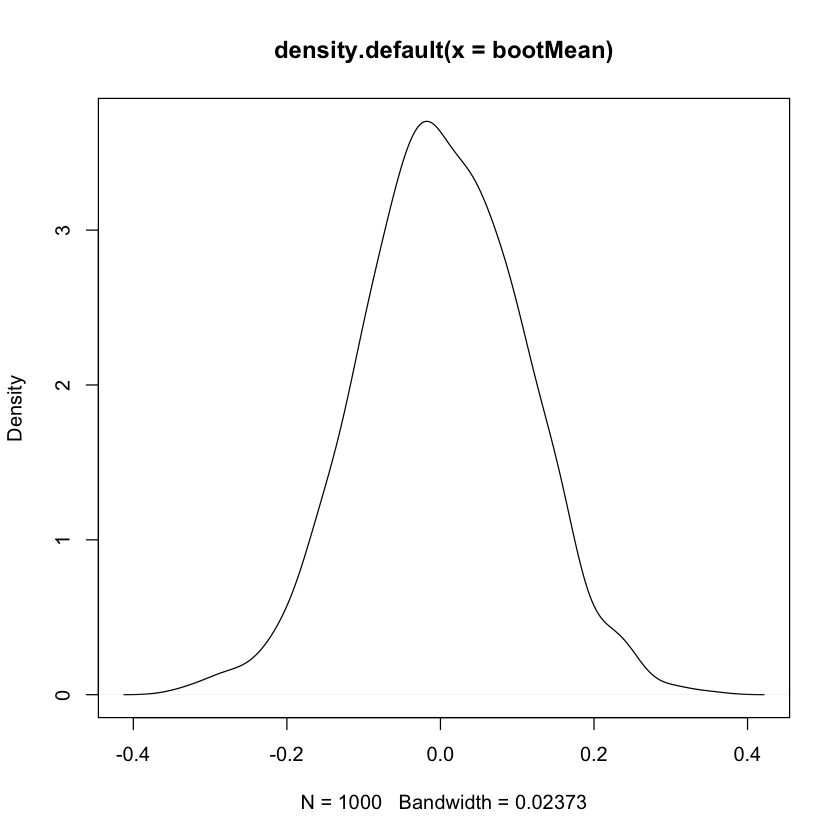

In [5]:
test(100,1000)

[1] "Mean of bootstrap distribution:  -0.0848198251918195"


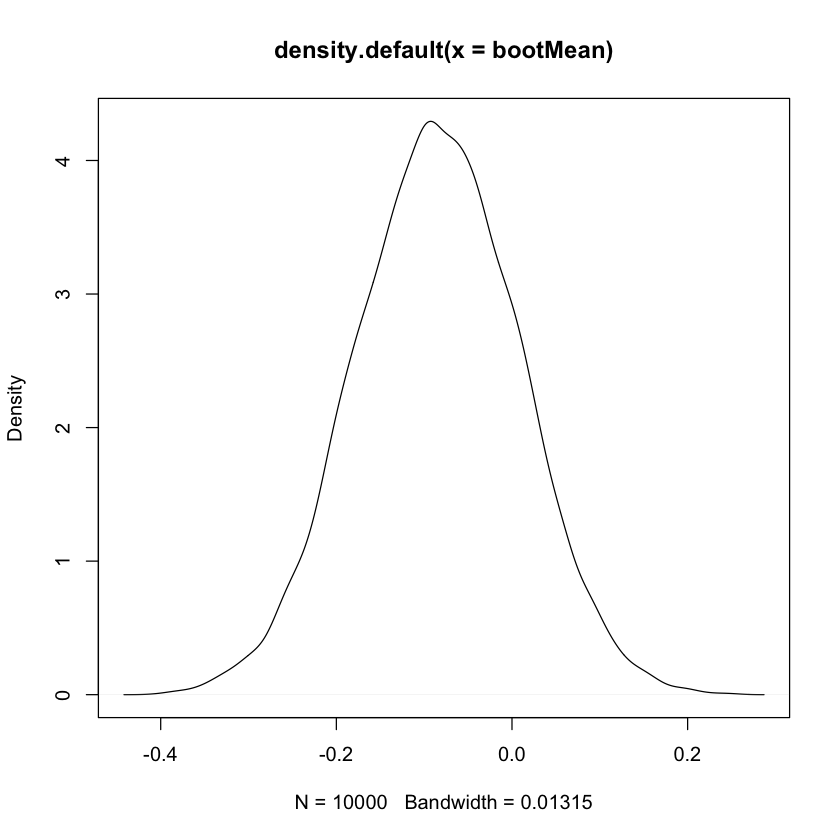

In [6]:
test(100,10000)

[1] "Mean of bootstrap distribution:  -0.0397786410817463"


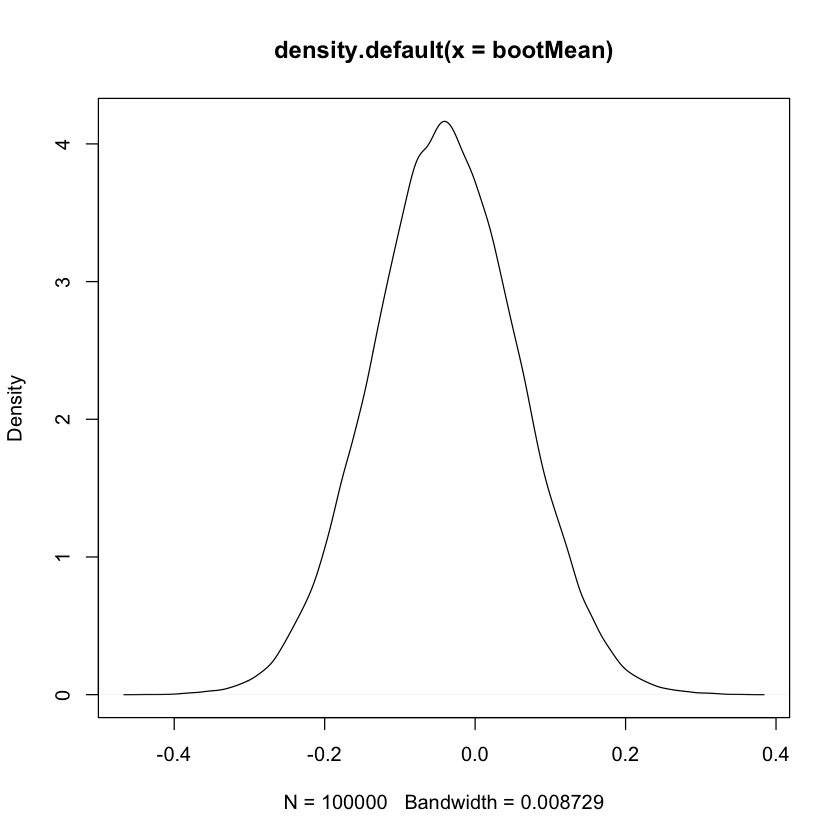

In [7]:
test(100,100000)

## Characteristics of the Bootstrap distribution

One problem remains unknown is, in this case when estimate $\mu$ of the distribution, that **whether the center of a boostrap distribution correspond with the center of our sampling distribution for the hat mean $\hat{\mu}$**. From above graph, we can find that the answer is **NO**.  
In fact, the center of the bootstrap distribution will be approximately $\hat{\mu}$ of the original sample: not centered at $\mu$.  
This is notable because the sampling distribution of $\hat{\mu}$ is centered at $\mu$.  
W.r.t the spread, the spread of the bootstrap distribution can approximate the spread of the sampling distribution. Also, the skew of the sampling distribution can be approximated by the skew of the bootstrap distribution.  

If we use boostrapping to plot the distribution and we find that the distribution is very skew, that means the sampling distributuion is also very skew.

Source: [Bootstrapping and resampling](https://www.youtube.com/watch?v=0hNQx9nagq4)  

Bootstrap is a tremendously useful tool for constructing confidence intervals and calculating standard errors for difficult statistics.  
Bootstrap do the resample from the available datasets which forms a empirical distribution, then extrapolates the unknown distribution. Actually, bootstrap resampling is based on the empirical distribution, and use the probability of each value to do the resampling.